# 1. 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 폰트 및 스타일 설정
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')
%matplotlib inline

# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

# 1. 데이터 불러오기

In [2]:
df = pd.read_csv('./custom_data/base_data.csv', encoding='cp949')

df.head()

,사업자등록번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,영업이익（손실）,법인세비용차감전순손익,법인세비용,당기순이익(손실),기업순이익률(%),유보액/총자산(%),유보액/납입자본(%),매출액총이익률(%),매출액영업이익률(%),매출액순이익률(%),수지비율(%),경상수지비율,영업비율(%),금융비용대매출액비율(%,금융비용대부채비율(%),금융비용대총비용비율(%,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),유동부채비율(%),비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,기업접두명,기업명,기업접미명,기업영문명,업종,기업규모,공기업구분 1.공기업 2.일반기업,개인법인구분 1.법인 2.개인,본점지점구분 1.본점 2.지점,국외투자법인여부,벤처기업여부,상장코드,산업코드차수,산업코드1,산업코드2,산업코드3,공공기관유형,중견기업보호여부,본점기업코드,설립일자,설립구분,상장일자,주요사업내용,국가명,홈페이지URL,대표자명,직원수,종료일자,시작일자,휴폐업구분,상태발생일자
0,1018100340,20181231,2667731.0,127320.0,32346444.0,1179096.0,35014174.0,422872.0,16176067.0,16598939.0,721100.0,3859072.0,18415235.0,6629483.0,6210864.0,418619.0,3144847.0,635665.0,2509182.0,6.161,4.877,236.820,100.000,6.315,37.849,66.562,61.076,93.685,1.000000e+12,0.000,1.000000e+12,90.137,1.000000e+12,52.594,6.411,2.296,87.841,250.381,0.163,1.000000e+12,44.062,1.000000e+12,NaN,NaN,NaN,NaN,NaN,대일건설,(주),"Daeil Construction Co.,Ltd.",제조,중소기업,일반기업,법인,본점,N,N,NaN,10.0,68112.0,NaN,NaN,해당사항없음,N,NaN,19561228.0,주식,NaN,부동산임대업,NaN,없음,박형철외 1명,41.0,NaN,NaN,NaN,NaN
1,1018100340,20191231,2168837.0,94085.0,34151633.0,1209369.0,36320470.0,10553878.0,5240445.0,15794323.0,721100.0,3708092.0,20526147.0,6541583.0,5698511.0,843072.0,3446082.0,712661.0,2733421.0,7.600,4.300,215.900,100.000,12.900,41.800,62.600,NaN,87.100,NaN,0.000,NaN,76.900,0.000000e+00,56.500,-23.100,51.400,25.500,241.400,0.184,1.000000e+12,59.092,NaN,NaN,NaN,NaN,NaN,NaN,대일건설,(주),"Daeil Construction Co.,Ltd.",제조,중소기업,일반기업,법인,본점,N,N,NaN,10.0,68112.0,NaN,NaN,해당사항없음,N,NaN,19561228.0,주식,NaN,부동산임대업,NaN,없음,박형철외 1명,41.0,NaN,NaN,NaN,NaN
2,1018100340,20201231,2272260.0,78612.0,38329680.0,1091153.0,40601940.0,863144.0,15496117.0,16359261.0,721100.0,4230449.0,24242679.0,5933317.0,5865171.0,68146.0,4180173.0,773416.0,3406757.0,8.858,5.121,288.321,100.000,1.149,57.417,58.602,-1336705.033,98.852,1.000000e+12,0.000,1.000000e+12,67.481,1.000000e+12,59.708,3.471,3.560,63.921,275.719,0.154,1.000000e+12,68.714,1.000000e+12,NaN,NaN,NaN,NaN,NaN,대일건설,(주),"Daeil Construction Co.,Ltd.",제조,중소기업,일반기업,법인,본점,N,N,NaN,10.0,68112.0,NaN,NaN,해당사항없음,N,NaN,19561228.0,주식,NaN,부동산임대업,NaN,없음,박형철외 1명,41.0,NaN,NaN,NaN,NaN
3,1018100340,20211231,1175030.0,273522.0,37135811.0,993025.0,38310842.0,9494272.0,4901383.0,14395654.0,721100.0,5169522.0,23915187.0,6158586.0,5771585.0,387000.0,4731471.0,907999.0,3823473.0,9.690,7.878,418.549,100.000,6.284,62.084,55.228,-634411.186,93.716,1.000000e+12,0.000,1.000000e+12,60.195,1.000000e+12,62.424,-21.715,39.700,20.495,233.749,0.156,1.000000e+12,34.979,1.000000e+12,3243.0,NaN,NaN,NaN,NaN,대일건설,(주),"Daeil Construction Co.,Ltd.",제조,중소기업,일반기업,법인,본점,N,N,NaN,10.0,68112.0,NaN,NaN,해당사항없음,N,NaN,19561228.0,주식,NaN,부동산임대업,NaN,없음,박형철외 1명,41.0,NaN,NaN,NaN,NaN
4,1018100772,20181231,422146.0,17011.0,20370096.0,20352846.0,20792242.0,2684934.0,11404637.0,14089571.0,52000.0,-7410129.0,6702671.0,1127092.0,446655.0,155690.0,20159.0,NaN,20159.0,1.231,-32.209,-12878.763,53.442,13.813,1.789,98.361,98.496,86.186,2.059900e+01,1.682,1.918600e+01,210.208,3.834900e+01,32.236,-10.883,40.058,170.151,1250.082,0.055,1.000000e+12,69.711,1.000000e+12,386880.0,524746.0,NaN,NaN,(주),쎈츄럴관광호텔,NaN,"Central Tourist Hotel Co.,Ltd.",제조,중소기업,일반기업,법인,본점,N,N,NaN,10.0,55101.0,NaN,NaN,해당사항없음,N,NaN,19691118.0,주식,NaN,부동산매매 및 부동산 임대업,NaN,NaN,이성숙,3.0,NaN,NaN,NaN,NaN


In [3]:
print(f"데이터의 크기: {df.shape}")

데이터의 크기: (110891, 77)


In [4]:
df.columns

Index(['사업자등록번호', '결산년월', '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채',
       '비유동부채', '부  채  총  계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비',
       '영업이익（손실）', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)',
       '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)',
       '수지비율(%)', '경상수지비율', '영업비율(%)', '금융비용대매출액비율(%', '금융비용대부채비율(%)',
       '금융비용대총비용비율(%', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)',
       '유동부채비율(%)', '비유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(회)', '재고자산회전율(회)',
       '매출채권회전율(회)', '매입채무회전율(회)', '미수금', '매출원가', '무형자산', '재고자산', '기업접두명',
       '기업명', '기업접미명', '기업영문명', '업종', '기업규모', '공기업구분 1.공기업 2.일반기업',
       '개인법인구분 1.법인 2.개인', '본점지점구분 1.본점 2.지점', '국외투자법인여부', '벤처기업여부', '상장코드',
       '산업코드차수', '산업코드1', '산업코드2', '산업코드3', '공공기관유형', '중견기업보호여부', '본점기업코드',
       '설립일자', '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명', '직원수',
       '종료일자', '시작일자', '휴폐업구분', '상태발생일자'],
      dtype='object')

# 2. Preprocessing & EDA

In [5]:
def resumetable(df):
    """
    데이터를 한눈에 파악하기 쉽도록 피처요약표를 생성하는 함수입니다.
    ---------------------------------------
    input = 데이터프레임
    retrun  = 피처요약표(데이터프레임)
    ---------------------------------------
    """
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = df.isna().sum().values
    summary['고윳값 개수'] = df.nunique().values
    
    return summary

In [6]:
resume_table = resumetable(df)
resume_table

,데이터 타입,결측값 개수,고윳값 개수
사업자등록번호,int64,0,35709
결산년월,int64,0,54
유동자산,float64,1005,102924
매출채권,float64,18614,84378
비유동자산,float64,2042,100547
유형자산,float64,7396,94320
자산총계,float64,995,103165
유동부채,float64,1152,102696
비유동부채,float64,11422,83283
부 채 총 계,float64,1077,102941


- 비재무 데이터 중에서 명목형이면서 고윳값이 너무 많은 데이터들이 많다.
- 우선, 고윳값이 3개 이하인 피처들을 먼저 확인한다.

## 2.1. 명목형 피처 고윳값 확인

In [7]:
# 고윳값이 3개 이하인 피처 확인
eigenvalue_under_three = resume_table.loc[resume_table['고윳값 개수'] <= 3].index

for i in eigenvalue_under_three:
    print(f'{i} 피처의 고윳값은 {df[i].unique()} 입니다.')

기업규모 피처의 고윳값은 ['중소기업'] 입니다.
공기업구분 1.공기업 2.일반기업 피처의 고윳값은 ['일반기업' '공기업'] 입니다.
개인법인구분 1.법인 2.개인 피처의 고윳값은 ['법인'] 입니다.
본점지점구분 1.본점 2.지점 피처의 고윳값은 ['본점' '지점'] 입니다.
국외투자법인여부 피처의 고윳값은 ['N' 'Y'] 입니다.
벤처기업여부 피처의 고윳값은 ['N' 'Y'] 입니다.
산업코드차수 피처의 고윳값은 [10. nan] 입니다.
공공기관유형 피처의 고윳값은 ['해당사항없음' '지자체공단/공사' '공기업/준정부기관'] 입니다.
중견기업보호여부 피처의 고윳값은 ['N' 'Y'] 입니다.


- 고윳값이 하나인 피처들은 분석과 예측력 향상에 도움이 되지 않으므로 제거하도록 하자.
    - 기업규모, 개인법인구분, 산업코드차수
- 고윳값이 2개인 피처들은 추후에 0과 1로 인코딩 해주자.
    - 공기업구분, 본점지점구분, 국외투자법인여부, 벤처기업여부, 중견기업보호여부
- 고윳값이 3개인 공공기관유형 피처는 추후에 원-핫 인코딩을 적용시켜주자.<br><br>
- 나머지 고윳값이 많은 피처들 중에서 예측에 도움이 되지 않는 피처들도 제거하도록 한다.
    - 기업접두명, 기업접미명, 기업영문명, 산업코드1, 산업코드2, 산업코드3, 본점기업코드, 설립일자, 설립구분, <br>
    상장일자, 주요사업내용, 국가명, 홈페이지URL, 대표자명, 종료일자, 시작일자, 상태발생일자

In [8]:
# 필요없는 피처 제거
df_drop_col = df.drop(['기업접두명', '기업접미명', '기업영문명', '기업규모', '개인법인구분 1.법인 2.개인', 
                       '상장코드', '산업코드차수', '산업코드1', '산업코드2', '산업코드3', '본점기업코드', '설립일자', 
                       '설립구분', '상장일자', '주요사업내용', '국가명', '홈페이지URL', '대표자명'], axis=1)

## 2.2. 사업자등록번호가 여러 개인 기업들 확인
사업자등록번호가 여러 개인 기업들이 확인된다. 이 기업들의 특징은 아래와 같다.

- 사업자등록번호가 다름에도 재무 결산 내역이 같은 경우
    - 법인지점이 있는 경우 법인지점 각각 사업자등록번호가 부여되며, 법인결산은 본지점통합처리되지 때문에 재무제표에 여러 사업자등록번호가 명기될 수 있음 <br><br>
- 사업자등록번호가 여러 개였다가 나중에 하나만 남는 경우
    - 사업장단위의 지점들이 사업자단위과세자사업자로 등록을 하게 되면 발생하는 현상으로, 사업자단위과세사업자가 되면 기존 지점에 있던 사업자등록번호가 <br>
    사라지면서 본점의 종된사업장으로 편입됨 <br><br>
출처: 성심세무회계 한재문 세무사

- 위에서 알아본 경우를 case1, case2로 나누어서 각각의 경우에 해당하는 사업자등록번호를 저장하고 아래와 같이 처리한다.
    - case1에 해당하는 경우 하나를 제외한 나머지 사업자등록번호를 저장 => 저장된 사업자등록번호는 추후 제거
    - case2에 해당하는 경우 size 값이 큰것, 즉 가장 결산을 많이 한 사업자등록번호를 제외한 나머지 사업자등록번호를 저장 => 저장된 사업자등록번호는 추후 제거

In [9]:
def check_biz_no(df):
    """
    사업자등록번호가 여러 개인 기업들을 찾고, 각 경우에 따라 처리하는 함수입니다.
    ----------------------------------------
    input = 데이터프레임
    return = 정제한 데이터프레임
    ----------------------------------------
    """
    group_data = df.groupby(['기업명', '사업자등록번호'], as_index=False).size()

    duplicated_cor_name = group_data[group_data.duplicated(subset=['기업명'])]['기업명'].unique()
    duplicated_cor_num = group_data[group_data.duplicated(subset=['기업명'])]['사업자등록번호'].unique()

    result_dict = [{"case1_사업자등록번호":[]}, {"case2_사업자등록번호":[]}]

    # case1, case2에 해당하는 사업자등록번호 찾기
    for dup_name, dup_num in zip(duplicated_cor_name, duplicated_cor_num):
        dup_count = group_data.loc[group_data['기업명'] == dup_name]['size'].values.tolist()
        if len(set(dup_count)) == 1:
            for i in range(len(dup_count)-1):
                result_dict[0]["case1_사업자등록번호"].append(group_data.loc[group_data['기업명'] == dup_name].iloc[i]['사업자등록번호'])
        elif len(set(dup_count)) != 1:
            for i in range(1, len(dup_count)):
                result_dict[1]["case2_사업자등록번호"].append(group_data.loc[group_data['기업명'] == dup_name].iloc[i]['사업자등록번호'])
    
    # case1에 해당하는 경우 제거하기
    for case1_num in result_dict[0]["case1_사업자등록번호"]:
        idx = df[df['사업자등록번호']==case1_num].index
        df.drop(idx, inplace=True)

    # case2에 해당하는 경우 제거하기
    for case2_num in result_dict[1]["case2_사업자등록번호"]:
        idx = df[df['사업자등록번호']==case2_num].index
        df.drop(idx, inplace=True)
    
    print("정제 완료!")

In [10]:
df_cleaning_biz_no = df_drop_col.copy()
check_biz_no(df_cleaning_biz_no)

print(f"사업자등록번호가 여러 개인 기업들을 기준에 따라 정제한 결과 {df_drop_col.shape[0] - df_cleaning_biz_no.shape[0]}개의 데이터가 제거되었습니다.")

정제 완료!
사업자등록번호가 여러 개인 기업들을 기준에 따라 정제한 결과 6243개의 데이터가 제거되었습니다.


In [11]:
print(f"사업자등록번호를 기준으로 정제 후 데이터의 크기: {df_cleaning_biz_no.shape}")

사업자등록번호를 기준으로 정제 후 데이터의 크기: (104648, 59)


## 2.3. 재무 데이터의 결측치, 이상치 정리하기

### 2.3.1. 기본적인 결측치, 이상치 정리하기
- 재무 데이터의 경우 결측치가 다수 존재하며 이상치가 의미없는 값(8.888889e+11, 1.000000e+12)으로 있다.
- 따라서 이에 해당하는 값들을 0으로 변환한다.

In [38]:
df_finance_missing_value = df_cleaning_biz_no.copy()

In [39]:
finance_columns = df_finance_missing_value.columns[:46]

# 결측치를 0으로 변환
df_finance_missing_value[finance_columns] = df_finance_missing_value[finance_columns].fillna(0)

for column in finance_columns:
    df_finance_missing_value[column] = df_finance_missing_value[column].apply(lambda x: 0 if x == 1000000000000 else x)
    df_finance_missing_value[column] = df_finance_missing_value[column].apply(lambda x: 0 if x == 888888888889 else x)

In [40]:
print(f"정제 후 결측치의 개수: {df_finance_missing_value[finance_columns].isna().sum().sum()}개")
total = 0
for column in finance_columns:
    total += len(df_finance_missing_value.loc[(df_finance_missing_value[column] == 1000000000000) | (df_finance_missing_value[column] == 888888888889)])
print(f"정제 후 이상치의 개수: {total}개")

정제 후 결측치의 개수: 0개
정제 후 이상치의 개수: 0개


### 2.3.2. 자본금의 이상치 제거
- [NDB Q&A] 자본금이 (-) 인 경우, 개인에서 법인으로 전환된 것이다.
- 자본금이 음수가 되는 경우 0원으로 보는 것이 합리적이다.
- 조세특례제한법 제120조 5항
- (?) 자본금에 더해줘야하는가?

In [41]:
# 5개기업이 (-) 자본금을 가짐
count_minus_capital_stock = df_finance_missing_value.loc[df_finance_missing_value['자본금'] < 0].shape[0]
print(f"자본금이 음수인 기업의 개수: {count_minus_capital_stock}개")

자본금이 음수인 기업의 개수: 5개


In [42]:
# 0으로 바꿈
df_finance_missing_value['자본금'] = df_finance_missing_value['자본금'].apply(lambda x: 0 if x < 0 else x)
count_minus_capital_stock = df_finance_missing_value.loc[df_finance_missing_value['자본금'] < 0].shape[0]
print(f"정제 후 자본금이 음수인 기업의 개수: {count_minus_capital_stock}개")

정제 후 자본금이 음수인 기업의 개수: 0개


### 2.3.3. 자산의 이상치 제거
- 자산총계가 0인 행 중 모든 컬럼의 값이 0인 행이 절대다수이다.
- 자산총계가 0인 기업의 재무데이터는 결측치가 많기 때문에 제거한다.

In [43]:
df_finance_missing_value.loc[df_finance_missing_value['자산총계'] == 0].iloc[:5, :46]

,사업자등록번호,결산년월,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,이익잉여금(결손금）,자본총계,매출액,판매비와관리비,영업이익（손실）,법인세비용차감전순손익,법인세비용,당기순이익(손실),기업순이익률(%),유보액/총자산(%),유보액/납입자본(%),매출액총이익률(%),매출액영업이익률(%),매출액순이익률(%),수지비율(%),경상수지비율,영업비율(%),금융비용대매출액비율(%,금융비용대부채비율(%),금융비용대총비용비율(%,부채비율(%),차입금의존도(%),자기자본비율(%),순운전자본비율(%),유동부채비율(%),비유동부채비율(%),부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산
284,1018164892,20191231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,1018164892,20201231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,1018164892,20211231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
340,1018179639,20191231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
341,1018179639,20201231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
count_zero_total_assets = df_finance_missing_value.loc[df_finance_missing_value['자산총계'] == 0].shape[0]
df_finance_missing_value = df_finance_missing_value[df_finance_missing_value['자산총계'] != 0]

print(f"자산의 이상치 제거 결과 {count_zero_total_assets}개의 데이터가 제거되었습니다.")

자산의 이상치 제거 결과 989개의 데이터가 제거되었습니다.


## 2-3. 휴폐업의 정의 확인 및 타겟값 구분 기준 정하기

- 휴업이란 사업자가 일시적으로 주된 영업활동을 정지하였으나 장래영업활동을 재개하고자 하는 의사를 가지고 영업시설의 유지. 관리 또는 개량행위 등을 행하는 상태이고, 
- 폐업이란 사업자가 당해 영업을 계속할 의사가 없어 영업활동을 영구적으로 종료하는 것이다.
- 휴업의 경우 장래영업활동 재개 의사를 가지고 있지만, 신용평가기관의 입장에서는 주의가 필요한 상태라고 생각한다.
- 따라서 휴업과 폐업을 하나로 묶어서 보기로 한다.

In [45]:
# 휴업을 폐업으로 인코딩
def target_encoding(value):
    if value == "폐업" or value == "휴업":
        return "폐업"
    return "영업중"

df_target_encoded = df_finance_missing_value.copy()
df_target_encoded['휴폐업구분'] = df_finance_missing_value['휴폐업구분'].apply(target_encoding)

### 타겟값 분포 확인하기

In [46]:
# 타겟값의 분포 살펴보기
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        ax.text(left_coord+width/2.0,
                height+total_size*0.001,
                '{:1.1f}%'.format(percent),
                ha='center')

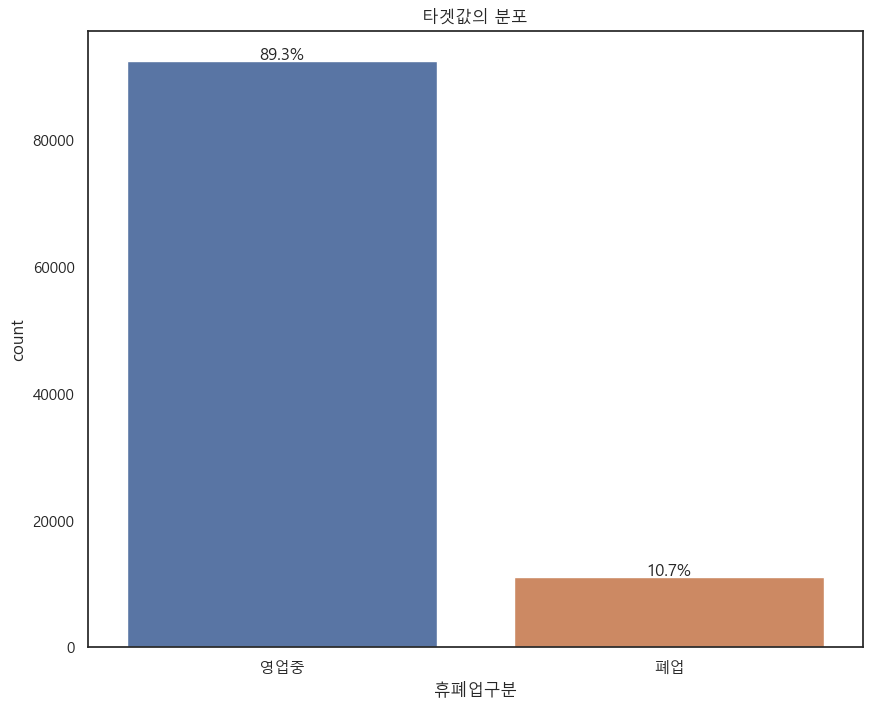

In [47]:
fig = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x='휴폐업구분', data=df_target_encoded)
write_percent(ax, len(df_target_encoded))
ax.set_title("타겟값의 분포");

- 타겟값 폐업의 분포가 매우 적다.
- 타겟값의 비율이 작은 것에 대한 고윳값의 분포가 서로 차이가 없거나,
- 신뢰구간이 너무 넓어 통계적 유효성이 떨어지는 경우 예측력 향상에 도움이 되지 않으므로 제거해야한다.
- 따라서 피처의 고윳값 별 타겟값 1(폐업)의 분포를 살펴보자.

### 명목형 피처 확인하기

In [48]:
# 명목형 피처 시각화
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    mpl.rc('font', size=9) 
    plt.figure(figsize=size)                     # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.3, hspace=0.5)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        # ax축에 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
        sns.barplot(x=feature, y='휴폐업구분', data=df, palette='Set2', ax=ax)
        plt.title(f'{feature}의 고윳값에 따른 타겟값 1(폐업)의 비율')

In [49]:
# 시각화를 위한 타겟값 인코딩
def target_encoding(value):
    if value == "폐업":
        return 1
    return 0

df_target_encoded = df_drop_col.copy()
df_target_encoded['휴폐업구분'] = df_drop_col['휴폐업구분'].apply(target_encoding)

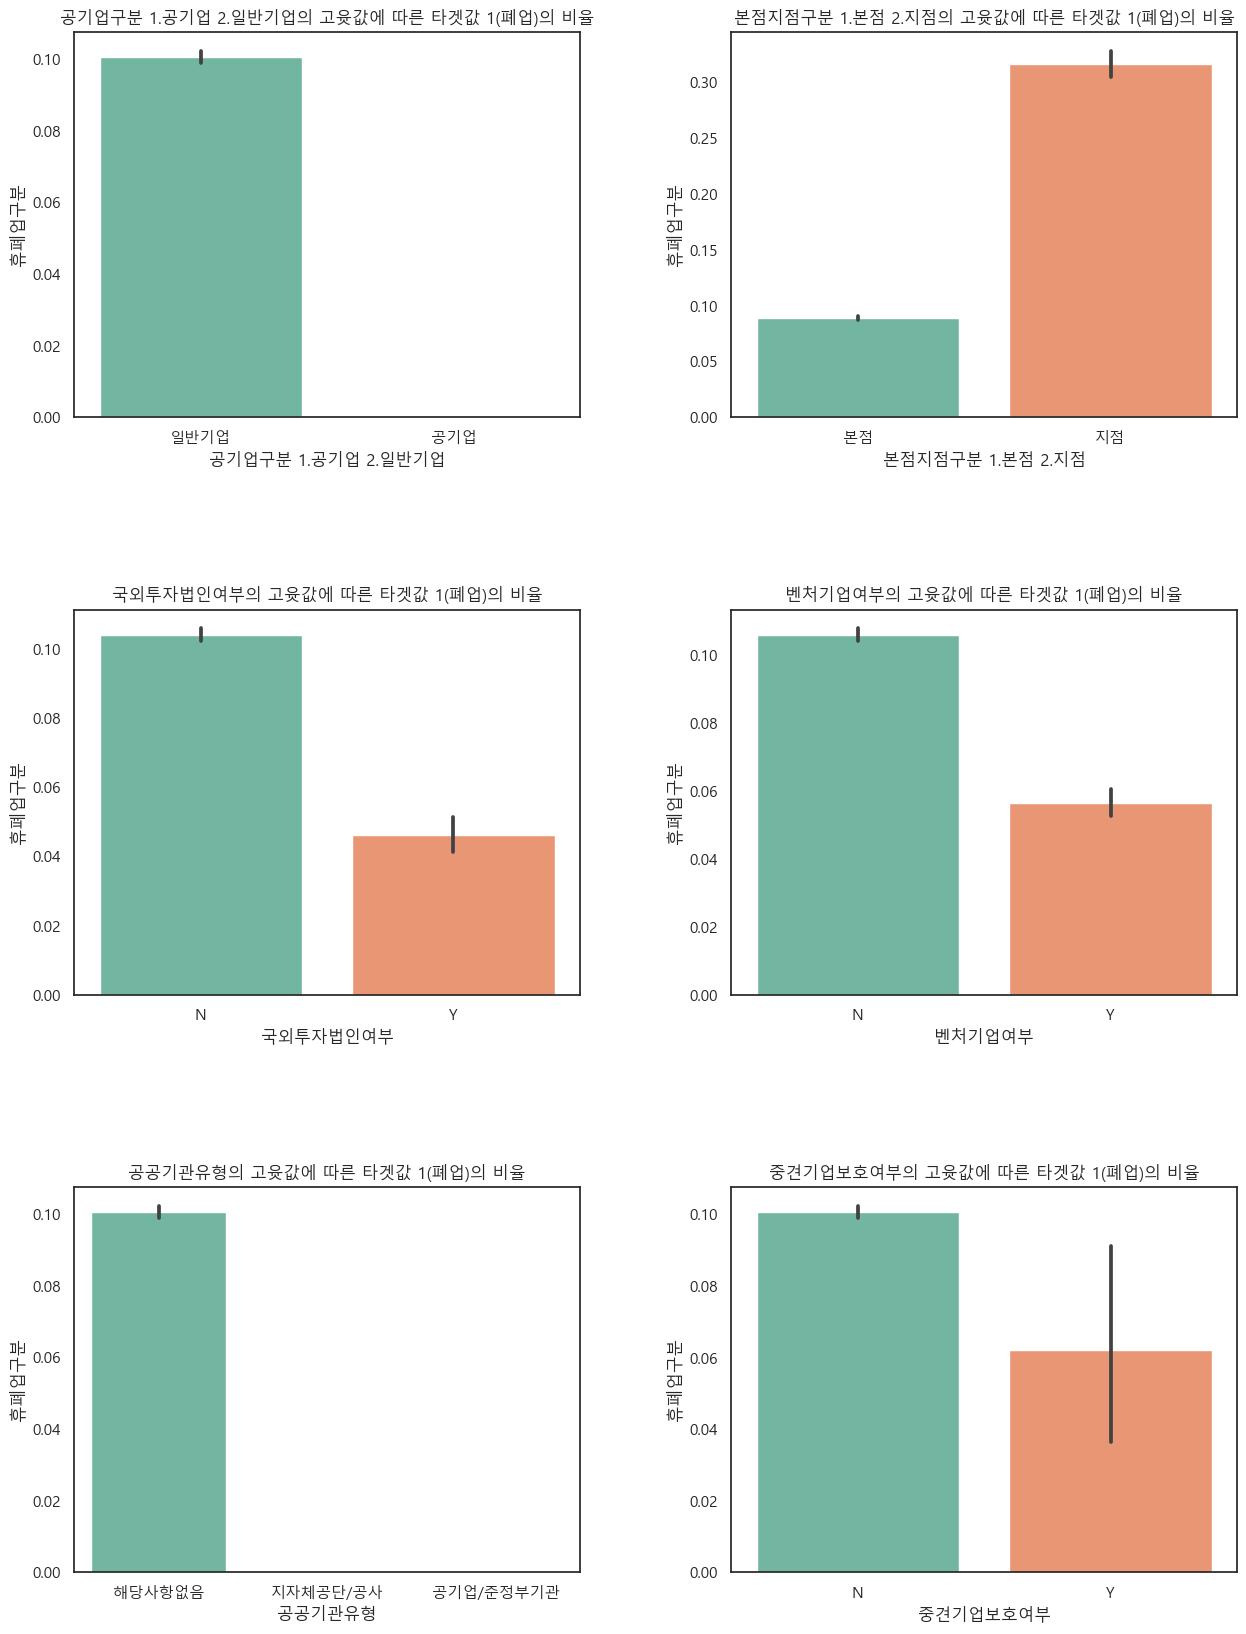

In [50]:
bin_features = resume_table[(resume_table['고윳값 개수'] == 2) | (resume_table['고윳값 개수'] == 3)].index # 이진 피처
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_target_ratio_by_features(df_target_encoded, bin_features, 3, 2) # 3행 2열 배치

- 명목형 피처 분석 결과
    - 공기업 중에는 폐업을 한 기업이 없고, 일반 기업에 해당하는 경우에만 폐업을 했다.
    - 또한 공공기관에 해당하지 않은 경우에만 폐업이 일어났다.
        - **=> 공기업의 경우 재무적 요소가 안정적이기 때문일까?**
    - 외감에 해당하지 않은 기업들이 대부분 폐업을 한다.
        -  => **규모가 작을 수록 폐업할 확률이 높기 때문일까?**
    - 중견기업보호여부의 경우 Y 값의 신뢰구간이 매우 넓기 때문에 통계적 유효성이 떨어진다. 따라서 제거하도록 한다.
    

In [51]:
df_drop_MDSCO_PRTC_YN = df_target_encoded.drop('중견기업보호여부', axis=1)

### 직원 수의 결측치 처리
- 재무 피처들과 직원수의 상관관계를 파악해서 직원수를 보간할 때 기준으로 삼을 피처를 찾아보자.
- 피처를 찾으면, 해당 피처를 구간별로 나누어서 해당 구간의 평균 직원수를 구해서 보간하도록 하자.

In [52]:
corr_columns = finance_columns.tolist()
corr_columns.append('직원수')
df_corr = df_drop_MDSCO_PRTC_YN[corr_columns].corr()
df_corr['직원수'].sort_values(ascending=False).iloc[1:].head()

판매비와관리비      0.243267
매출액          0.107852
차입금의존도(%)    0.107642
매출원가         0.099346
매출채권         0.069497
Name: 직원수, dtype: float64

- 직원수와 연관이 있어보이는 재무 피처가 없다.
- 직원수와 재무데이터의 상관관계에서 유의미한 결과를 찾지 못했으므로 결측치 보간이 어렵다고 판단되므로 직원수도 제거하도록 하자.

In [53]:
df_drop_final = df_drop_MDSCO_PRTC_YN.drop(['직원수', '종료일자', '시작일자', '상태발생일자'], axis=1) # 일자 데이터도 일단 제거

In [54]:
df_drop_final.columns

Index(['사업자등록번호', '결산년월', '유동자산', '매출채권', '비유동자산', '유형자산', '자산총계', '유동부채',
       '비유동부채', '부  채  총  계', '자본금', '이익잉여금(결손금）', '자본총계', '매출액', '판매비와관리비',
       '영업이익（손실）', '법인세비용차감전순손익', '법인세비용', '당기순이익(손실)', '기업순이익률(%)',
       '유보액/총자산(%)', '유보액/납입자본(%)', '매출액총이익률(%)', '매출액영업이익률(%)', '매출액순이익률(%)',
       '수지비율(%)', '경상수지비율', '영업비율(%)', '금융비용대매출액비율(%', '금융비용대부채비율(%)',
       '금융비용대총비용비율(%', '부채비율(%)', '차입금의존도(%)', '자기자본비율(%)', '순운전자본비율(%)',
       '유동부채비율(%)', '비유동부채비율(%)', '부채총계대 매출액(%)', '총자본회전율(회)', '재고자산회전율(회)',
       '매출채권회전율(회)', '매입채무회전율(회)', '미수금', '매출원가', '무형자산', '재고자산', '기업명', '업종',
       '공기업구분 1.공기업 2.일반기업', '본점지점구분 1.본점 2.지점', '국외투자법인여부', '벤처기업여부',
       '공공기관유형', '휴폐업구분'],
      dtype='object')

### 데이터 인코딩
- 인코딩 대상 피처
    - 업종, 공기업구분 1.공기업 2.일반기업, 본점지정구분 1.본점 2.지점, 국외투자법인여부, 벤처기업여부, 공공기관유형, 외감여부
- 인코딩 방법
    - 이진 피처 -> 0과 1로 인코딩
        - 공기업구분 1.공기업 2.일반기업, 본점지정구분 1.본점 2.지점, 국외투자법인여부, 벤처기업여부, 외감여부
    - 명목형 피처 -> 원-핫 인코딩
        - 업종, 공공기관유형

In [55]:
# 이진피처 인코딩
def binary_encoding(value):
    """
    이진 피처들을 0과 1로 인코딩하는 함수입니다.
    ---------------------------------------
    input = 이진피처(문자열)
    retrun  = 0 또는 1
    ---------------------------------------
    0: N, 지점, 일반기업
    1: Y, 공기업, 본점
    """
    zero_value = ['N', '지점', '일반기업']

    if value in zero_value:
        return 0
    return 1

binary_features = ['공기업구분 1.공기업 2.일반기업', '본점지점구분 1.본점 2.지점', '국외투자법인여부', '벤처기업여부']

for bin_feature in binary_features:
    df_drop_final[bin_feature] = df_drop_final[bin_feature].apply(binary_encoding)

In [56]:
# 명목형 피처 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

# 명목형 피처 추출
cat_features = ['업종', '공공기관유형']

# 원-핫 인코딩 객체 생성
onehot_encoder = OneHotEncoder()

# 원-핫 인코딩 적용
encoded_cat_matrix = onehot_encoder.fit_transform(df_drop_final[cat_features])

In [57]:
# 필요없는 피처 제거(최종)
drop_features = ['업종', '공공기관유형', '기업명', '사업자등록번호', '결산년월', '휴폐업구분']

remaining_features = [feature_name for feature_name in df_drop_final.columns
                      if (feature_name not in drop_features)]

remaining_features

['유동자산',
 '매출채권',
 '비유동자산',
 '유형자산',
 '자산총계',
 '유동부채',
 '비유동부채',
 '부  채  총  계',
 '자본금',
 '이익잉여금(결손금）',
 '자본총계',
 '매출액',
 '판매비와관리비',
 '영업이익（손실）',
 '법인세비용차감전순손익',
 '법인세비용',
 '당기순이익(손실)',
 '기업순이익률(%)',
 '유보액/총자산(%)',
 '유보액/납입자본(%)',
 '매출액총이익률(%)',
 '매출액영업이익률(%)',
 '매출액순이익률(%)',
 '수지비율(%)',
 '경상수지비율',
 '영업비율(%)',
 '금융비용대매출액비율(%',
 '금융비용대부채비율(%)',
 '금융비용대총비용비율(%',
 '부채비율(%)',
 '차입금의존도(%)',
 '자기자본비율(%)',
 '순운전자본비율(%)',
 '유동부채비율(%)',
 '비유동부채비율(%)',
 '부채총계대 매출액(%)',
 '총자본회전율(회)',
 '재고자산회전율(회)',
 '매출채권회전율(회)',
 '매입채무회전율(회)',
 '미수금',
 '매출원가',
 '무형자산',
 '재고자산',
 '공기업구분 1.공기업 2.일반기업',
 '본점지점구분 1.본점 2.지점',
 '국외투자법인여부',
 '벤처기업여부']

In [58]:
# 원-핫 인코딩한 결과와 제거하고 남은 피처들을 하나로 합치기
from scipy import sparse

data_sprs = sparse.hstack([sparse.csr_matrix(df_drop_final[remaining_features]),
                               encoded_cat_matrix],
                               format='csr')
data_sprs

<110891x59 sparse matrix of type '<class 'numpy.float64'>'
	with 5198892 stored elements in Compressed Sparse Row format>

# 베이스라인 만들기
- 베이스라인 모델은 LightGBM 모델로 선정했다.

In [59]:
# 타겟값 나누기
X = data_sprs
y = df_drop_final['휴폐업구분'].values

In [60]:
# 훈련셋, 테스트셋 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
# 훈련셋, 검증셋 나누기
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [62]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

In [63]:
evals = [(X_train, y_train), (X_val, y_val)]

In [64]:
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=False)

c:\Users\ASUS\.conda\envs\cabta\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
c:\Users\ASUS\.conda\envs\cabta\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.05, n_estimators=400)

In [65]:
preds = lgbm_wrapper.predict(X_test)

In [66]:
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

In [67]:
# 평가지표 출력하는 함수 설정
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [68]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[19700   249]
 [  878  1352]]
정확도: 0.9492, 정밀도: 0.8445, 재현율: 0.6063,    F1: 0.7058, AUC:0.9365


- 실제 폐업인 경우를 영업으로 잘못 판단하거나 영업인 경우를 폐업으로 잘못 판단하면 안되기 때문에 정밀도보다 재현율이 더 중요하다.
- 따라서 추후 모델 성능 향상 시 재현율의 향상도 고려해야할 것 같다.